In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()

In [2]:
nob = pd.read_csv('/content/drive/MyDrive/nobel.csv')
nob.sample(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
206,1939,Physics,The Nobel Prize in Physics 1939,"""for the invention and development of the cycl...",1/1,47,Individual,Ernest Orlando Lawrence,1901-08-08,"Canton, SD",United States of America,Male,University of California,"Berkeley, CA",United States of America,1958-08-27,"Palo Alto, CA",United States of America
469,1976,Peace,The Nobel Peace Prize 1976,NaN,1/2,536,Individual,Mairead Corrigan,1944-01-27,Belfast,Northern Ireland,Female,NaN,NaN,NaN,NaN,NaN,NaN
736,2002,Chemistry,The Nobel Prize in Chemistry 2002,"""for his development of nuclear magnetic reson...",1/2,758,Individual,Kurt Wüthrich,1938-10-04,Aarberg,Switzerland,Male,Eidgenössische Technische Hochschule (Swiss Fe...,Zurich,Switzerland,NaN,NaN,NaN


In [3]:
nob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [4]:
nob = nob[['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex']]
nob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           911 non-null    int64 
 1   category       911 non-null    object
 2   prize          911 non-null    object
 3   motivation     823 non-null    object
 4   prize_share    911 non-null    object
 5   laureate_id    911 non-null    int64 
 6   laureate_type  911 non-null    object
 7   full_name      911 non-null    object
 8   birth_date     883 non-null    object
 9   birth_city     883 non-null    object
 10  birth_country  885 non-null    object
 11  sex            885 non-null    object
dtypes: int64(2), object(10)
memory usage: 85.5+ KB


## ***In this Dataset i will remove all rows that have a null values , so this analysis will not be accurate 100% due to missing of some lauretes .


In [5]:
nob = nob.dropna(subset = ['birth_date' , 'birth_city' , 'birth_country' , 'sex' , 'motivation'] )
nob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 910
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           809 non-null    int64 
 1   category       809 non-null    object
 2   prize          809 non-null    object
 3   motivation     809 non-null    object
 4   prize_share    809 non-null    object
 5   laureate_id    809 non-null    int64 
 6   laureate_type  809 non-null    object
 7   full_name      809 non-null    object
 8   birth_date     809 non-null    object
 9   birth_city     809 non-null    object
 10  birth_country  809 non-null    object
 11  sex            809 non-null    object
dtypes: int64(2), object(10)
memory usage: 82.2+ KB


In [6]:
nob.sample()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex
576,1987,Medicine,The Nobel Prize in Physiology or Medicine 1987,"""for his discovery of the genetic principle fo...",1/1,436,Individual,Susumu Tonegawa,1939-09-06,Nagoya,Japan,Male


In [7]:
nob.shape

(809, 12)

In [8]:
nob['prize_share'].value_counts()

prize_share
1/1    288
1/2    261
1/3    200
1/4     60
Name: count, dtype: int64

In [9]:
n_prizes = (1/1 * 288) + (1/2 * 261) + (1/3 * 200) + (1/4 * 60)
n_prizes = int(n_prizes)
n_prizes

500

In [10]:
fig = go.Figure()
fig.add_trace(go.Indicator(mode = 'number' , value = int(nob.shape[0]) , title = {"text" : "Number Of Lauretes"} , domain = {"row" : 0 , "column" : 0}))
fig.add_trace(go.Indicator(mode = 'number' , value = n_prizes , title = {"text" : "Number Of Prizes"} , domain = {"row" : 1 , "column" : 0}))
fig.update_layout(grid = {"rows" : 2 , "columns" : 1 , "pattern" : "independent"})

In [11]:
# we will see now which country had most prizes

px.bar(nob['birth_country'].value_counts().head(10) , title = "Top 10 Countries" , text_auto = True , color_discrete_sequence= ["#006600"])


In [12]:
nob['USA Winner'] = nob['birth_country'] == 'United States of America'
nob['decade'] = (np.floor(nob['year']/10)*10).astype(int)
USA = nob.groupby('decade' , as_index = False )['USA Winner'].mean()
USA

,decade,USA Winner
0,1900,0.000000
1,1910,0.030303
2,1920,0.046512
3,1930,0.255319
4,1940,0.277778
5,1950,0.296875
6,1960,0.271429
7,1970,0.351648
8,1980,0.356322
9,1990,0.415842


Text(0, 0.5, 'Winning Rate')

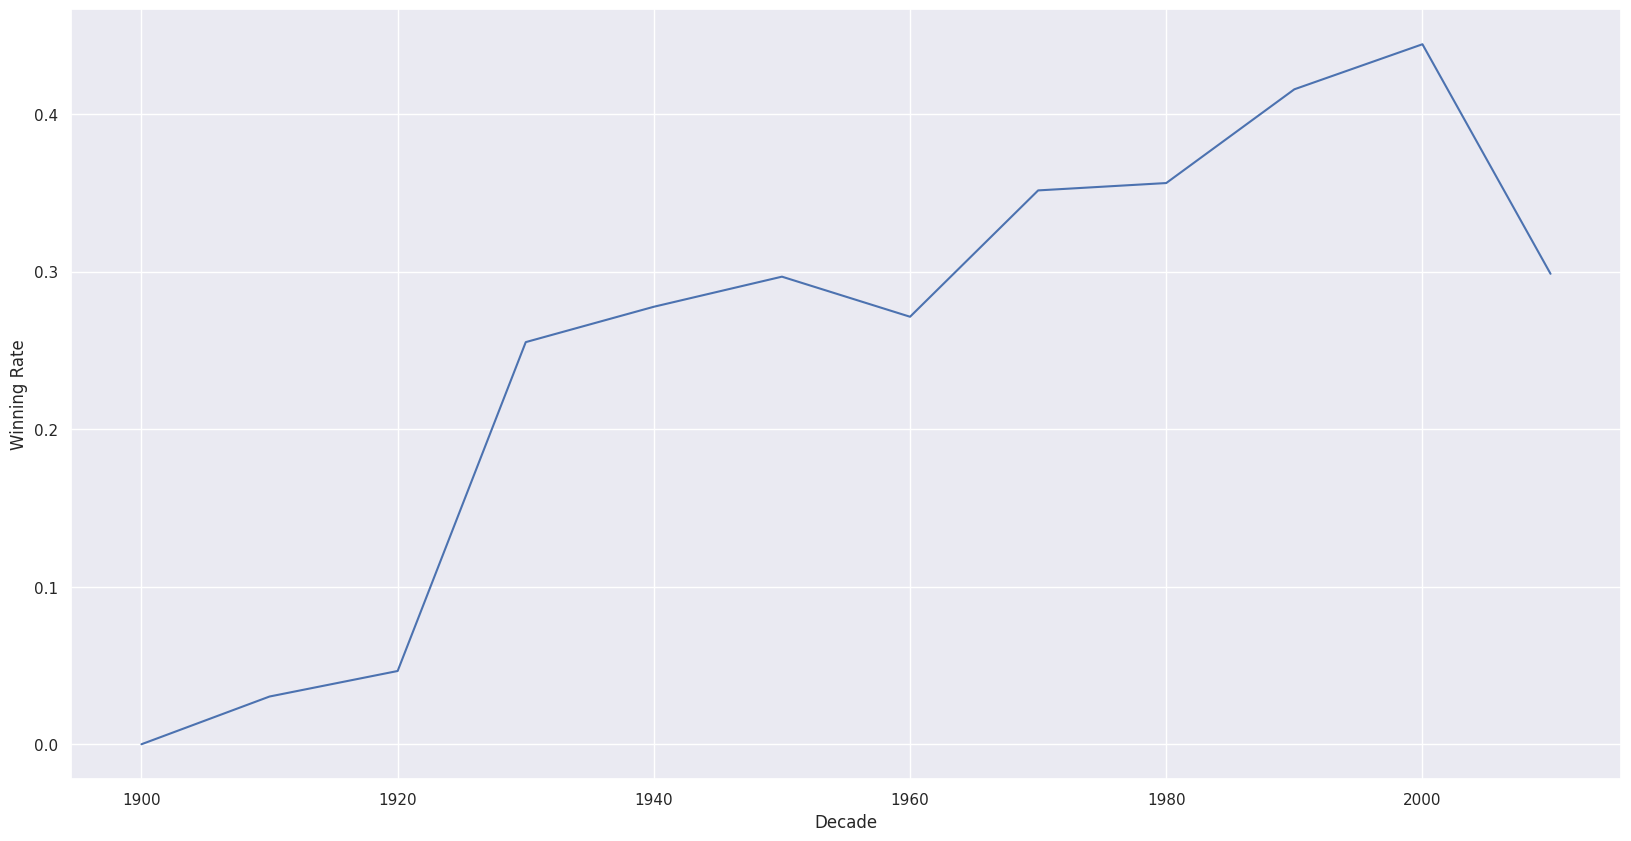

In [13]:
plt.figure(figsize = (20,10))
sns.lineplot(data = USA , x = 'decade' , y = 'USA Winner' )
plt.xlabel('Decade' , fontsize = 'medium')
plt.ylabel('Winning Rate' , fontsize = 'medium')

In [14]:
nob.sample(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,USA Winner,decade
601,1989,Physics,The Nobel Prize in Physics 1989,"""for the development of the ion trap technique""",1/4,137,Individual,Wolfgang Paul,1913-08-10,Lorenzkirch,Germany,Male,False,1980
651,1995,Chemistry,The Nobel Prize in Chemistry 1995,"""for their work in atmospheric chemistry, part...",1/3,282,Individual,Mario J. Molina,1943-03-19,Mexico City,Mexico,Male,False,1990
286,1955,Chemistry,The Nobel Prize in Chemistry 1955,"""for his work on biochemically important sulph...",1/1,218,Individual,Vincent du Vigneaud,1901-05-18,"Chicago, IL",United States of America,Male,True,1950


In [15]:
px.bar(nob['category'].value_counts().head(10) , title = "Top 10 Categories" , text_auto = True , color_discrete_sequence= ["#1a8cff"])

In [16]:
px.pie(data_frame = nob , names  = 'sex' , color_discrete_sequence=['#3366ff' , '#ff6699'])

In [17]:
fem = nob[nob['sex'] == 'Female']
fem.nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,USA Winner,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,False,1900


In [18]:
px.bar(fem['category'].value_counts().head(),title = "Top 5 Categories of femles " , text_auto = True , color_discrete_sequence= ["#ff6699"])

In [21]:
repeat = nob.groupby('full_name').filter(lambda x: len(x) > 1)
display(repeat[['full_name' , 'category' , 'prize' , 'year']])

,full_name,category,prize,year
19,"Marie Curie, née Sklodowska",Physics,The Nobel Prize in Physics 1903,1903
62,"Marie Curie, née Sklodowska",Chemistry,The Nobel Prize in Chemistry 1911,1911
298,John Bardeen,Physics,The Nobel Prize in Physics 1956,1956
306,Frederick Sanger,Chemistry,The Nobel Prize in Chemistry 1958,1958
424,John Bardeen,Physics,The Nobel Prize in Physics 1972,1972
505,Frederick Sanger,Chemistry,The Nobel Prize in Chemistry 1980,1980


In [30]:
rep_df = repeat['full_name'].value_counts()

In [32]:
nob['birth_date'] = pd.to_datetime(nob['birth_date'])
nob['age'] = nob['year'] - nob['birth_date'].dt.year
nob.nsmallest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,USA Winner,decade,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,False,2010,17


In [33]:
nob.nlargest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,USA Winner,decade,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,False,2000,90
